In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from math import pi

In [2]:
def kariya_circuit(trains, theta):

    q = QuantumRegister(5, name="x")
    c = ClassicalRegister(2, name="c")
    qc = QuantumCircuit(q, c)

    qc.u(-1.57, 0, 0, q[2])    # qc.u3(-1.57, 0, 0, q[2])

    qc.barrier()

    qc.h(q[0])
    qc.h(q[1])

    qc.barrier()

    qc.p(3.17, q[0])    # qc.u1(3.17, q[0])
    qc.p(1.59, q[1])    # qc.u1(1.59, q[1])
    qc.cu(pi, pi/2, -pi/2, 0, q[0], q[2])    # qc.cu3(pi, pi/2, -pi/2, q[0], q[2])
    qc.cu(pi/2, pi/2, -pi/2, 0, q[1], q[2])    # qc.cu3(pi/2, pi/2, -pi/2, q[1], q[2])

    qc.barrier()

    qc.h(q[1])
    qc.cp(-pi/2, q[0], q[1])    # qc.cu1(-pi/2, q[0], q[1])
    qc.h(q[0])

    qc.barrier()

    qc.cry(pi/4, q[0], q[3])
    qc.cry(pi/8, q[1], q[3])

    qc.barrier()

    qc.h(q[0])
    qc.cp(pi/2, q[0], q[1])    # qc.cu1(pi/2, q[0], q[1])
    qc.h(q[1])

    qc.barrier()

    qc.p(-1.59, q[0])    # qc.u1(-1.59, q[0])
    qc.p(-3.17, q[1])    # qc.u1(-3.17, q[1])
    qc.cu(-pi/2, pi/2, -pi/2, 0, q[0], q[2])    # qc.cu3(-pi/2, pi/2, -pi/2, q[0], q[2])
    qc.cu(-pi, pi/2, -pi/2, 0, q[1], q[2])    # qc.cu3(-pi, pi/2, -pi/2, q[1], q[2])

    qc.barrier()

    qc.h(q[0])
    qc.h(q[1])

    qc.barrier()

    qc.x(q[2])
    qc.ccx(q[2], q[3], q[4])
    qc.x(q[2])
    qc.cry(trains[0], q[4], q[1])
    qc.x(q[2])
    qc.ccx(q[2], q[3], q[4])
    qc.x(q[2])

    qc.barrier()

    qc.ccx(q[2], q[3], q[4])
    qc.cry(trains[1], q[4], q[1])
    qc.ccx(q[2], q[3], q[4])

    qc.barrier()

    qc.cry(-theta, q[3], q[1])
    qc.ch(q[3], q[2])

    qc.barrier()

    qc.h(q[3])
    qc.measure(q[3], c[0])
    qc.h(q[0])
    qc.measure(q[0], c[1])
    
    return qc

In [3]:
trains = [-2.445329661647363, 1.2598992417206438]
thetas = [0.22190540181382196,
          -2.445329661647363,
          2.3469316292555544,
          0.46587531862791004,
          2.618552423351554,
          -2.2679542943142543,
          0.6858226665030666,
          -0.8861995981514541,
          -0.6609035330567311,
          -0.4977147490473767,
          1.2598992417206438,
          -1.2960608846915842,
          1.0894985364190608,
          1.1272297820406245,
          0.6608630899761982,
          -0.3594689482813536,
          0.4508652937314785,
          0.8324537804952823,
          0.9571060089140446,
          0.10493949838653123]

counts = []

for theta in thetas:
    qc = kariya_circuit(trains, theta)

    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, simulator, shots=8192)
    result = job.result().get_counts()
    result = {key[1]: val for key, val in result.items() if key[0] == '0'}
    if result['0'] > result['1']:
        counts.append(0)
    else:
        counts.append(1)

print(counts)

[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]


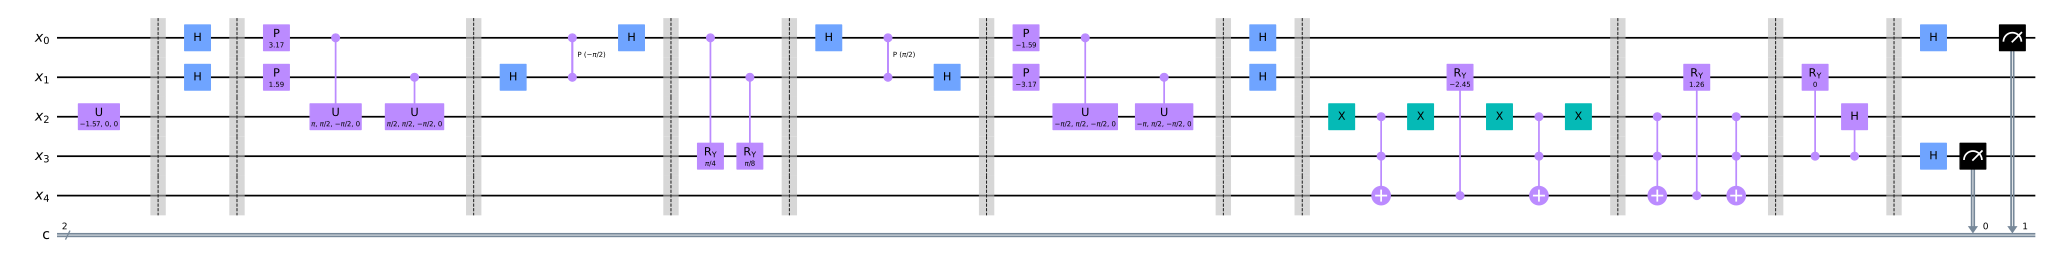

In [8]:
qc = kariya_circuit(trains, 0)
qc.draw(fold=-1)